In order to install CAMB you can do `conda install pycamb -c conda-forge`

The alternative is `pip install pycamb` -> This one may entail installing `gfortran` and linking to the newer `gfortran` version.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import camb
from camb.sources import GaussianSourceWindow, SplinedSourceWindow
import camb.correlations
from camb import model, initialpower
import numpy as np

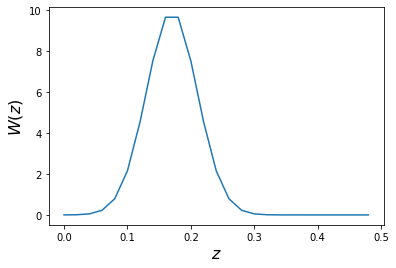

In [2]:
lmax=30000 # Maximum multipole for the power spectrum
pars = camb.CAMBparams() # Set up the CAMB parameters
h=0.675 # Planck value for h (Hubble parameter)
Ob = 0.044 # Planck value for Omega_b (Baryon energy density)
Om = 0.31 # Planck value for Omega_m (Matter energy density)
Oc = Om-Ob # Value for Omega_c (Cold dark matter energy density)
As=2e-9 # Amplitude of initial fluctuations
ns=0.965 # Scalar index
pars.set_cosmology(H0=100*h, ombh2=Ob*h**2, omch2=Oc*h**2) # This sets the cosmological parameters
pars.InitPower.set_params(As=As, ns=ns) # This also sets the cosmological parameters
pars.set_for_lmax(lmax, lens_potential_accuracy=1) # Set the maximum ell
#set Want_CMB to true if you also want CMB spectra or correlations
pars.Want_CMB = False # We don't want the CMB
#NonLinear_both or NonLinear_lens will use non-linear corrections
pars.NonLinear = model.NonLinear_both # We want non-linear corrections
#Set up W(z) window functions, later labelled W1, W2. Gaussian here.
zs = np.arange(0, 0.5, 0.02) # Range of zs
W = np.exp(-(zs - 0.17) ** 2 / 2 / 0.04 ** 2) / np.sqrt(2 * np.pi) / 0.04 # Window function
plt.plot(zs, W)
plt.xlabel('$z$', fontsize=16)
plt.ylabel('$W(z)$', fontsize=16)
pars.SourceWindows = [SplinedSourceWindow(source_type='counts', bias=1.2, z=zs, W=W)] # Set up the window function

In [3]:
%%time
results = camb.get_results(pars)
cls = results.get_source_cls_dict()
ls=  np.arange(2, lmax+1)

CPU times: user 2min 47s, sys: 659 ms, total: 2min 48s
Wall time: 46.1 s


CAMB returns the power spectrum for as many windows as we define. Note that it returns the power spectrum as:

$$C_{\ell}\ell(\ell+1)/2\pi$$

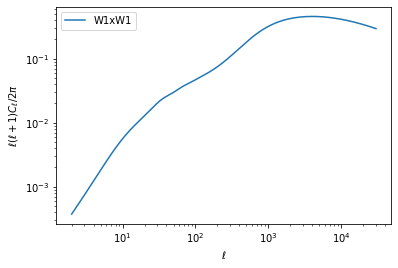

In [4]:
for spectrum in ['W1xW1']:
    plt.loglog(ls, cls[spectrum][2:lmax+1], label=spectrum)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.legend();

Now that we have the angular power spectrum we want to compute the correlation function. CAMB also has a way to compute the correlation function from the angular power spectrum:

In [5]:
angles = np.logspace(-2, 1) # Angles from 0.01 to 10 deg
x = np.cos(np.radians(angles)) # Convert them to radians and compute cosine to passs to CAMB
cls_in = np.array([cls['W1xW1'][1:lmax+1], np.zeros(lmax), np.zeros(lmax), np.zeros(lmax)]).T
#cl2corr needs TT (temperature/density), EE (E-mode), BB (B-mode), TE (Temperature-polarization cross correlation) -> we only care about TT
w_camb = camb.correlations.cl2corr(cls_in, x);

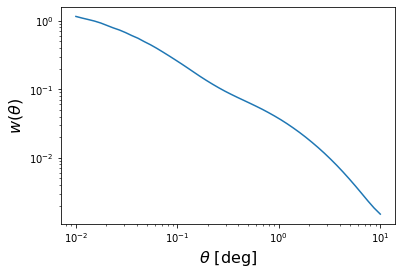

In [6]:
plt.loglog(angles, w_camb[:,0])
plt.xlabel(r'$\theta$ [deg]', fontsize=16)
plt.ylabel(r'$w(\theta)$', fontsize=16);